In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
a1 = np.random.random((100, 100)) > 0.95
a2 = np.random.random((100, 100)) > 0.95

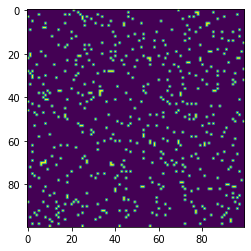

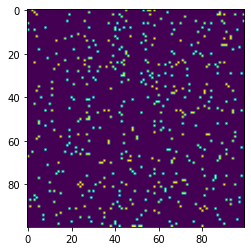

In [55]:
plt.imshow(a1)
plt.figure()
plt.imshow(a2)

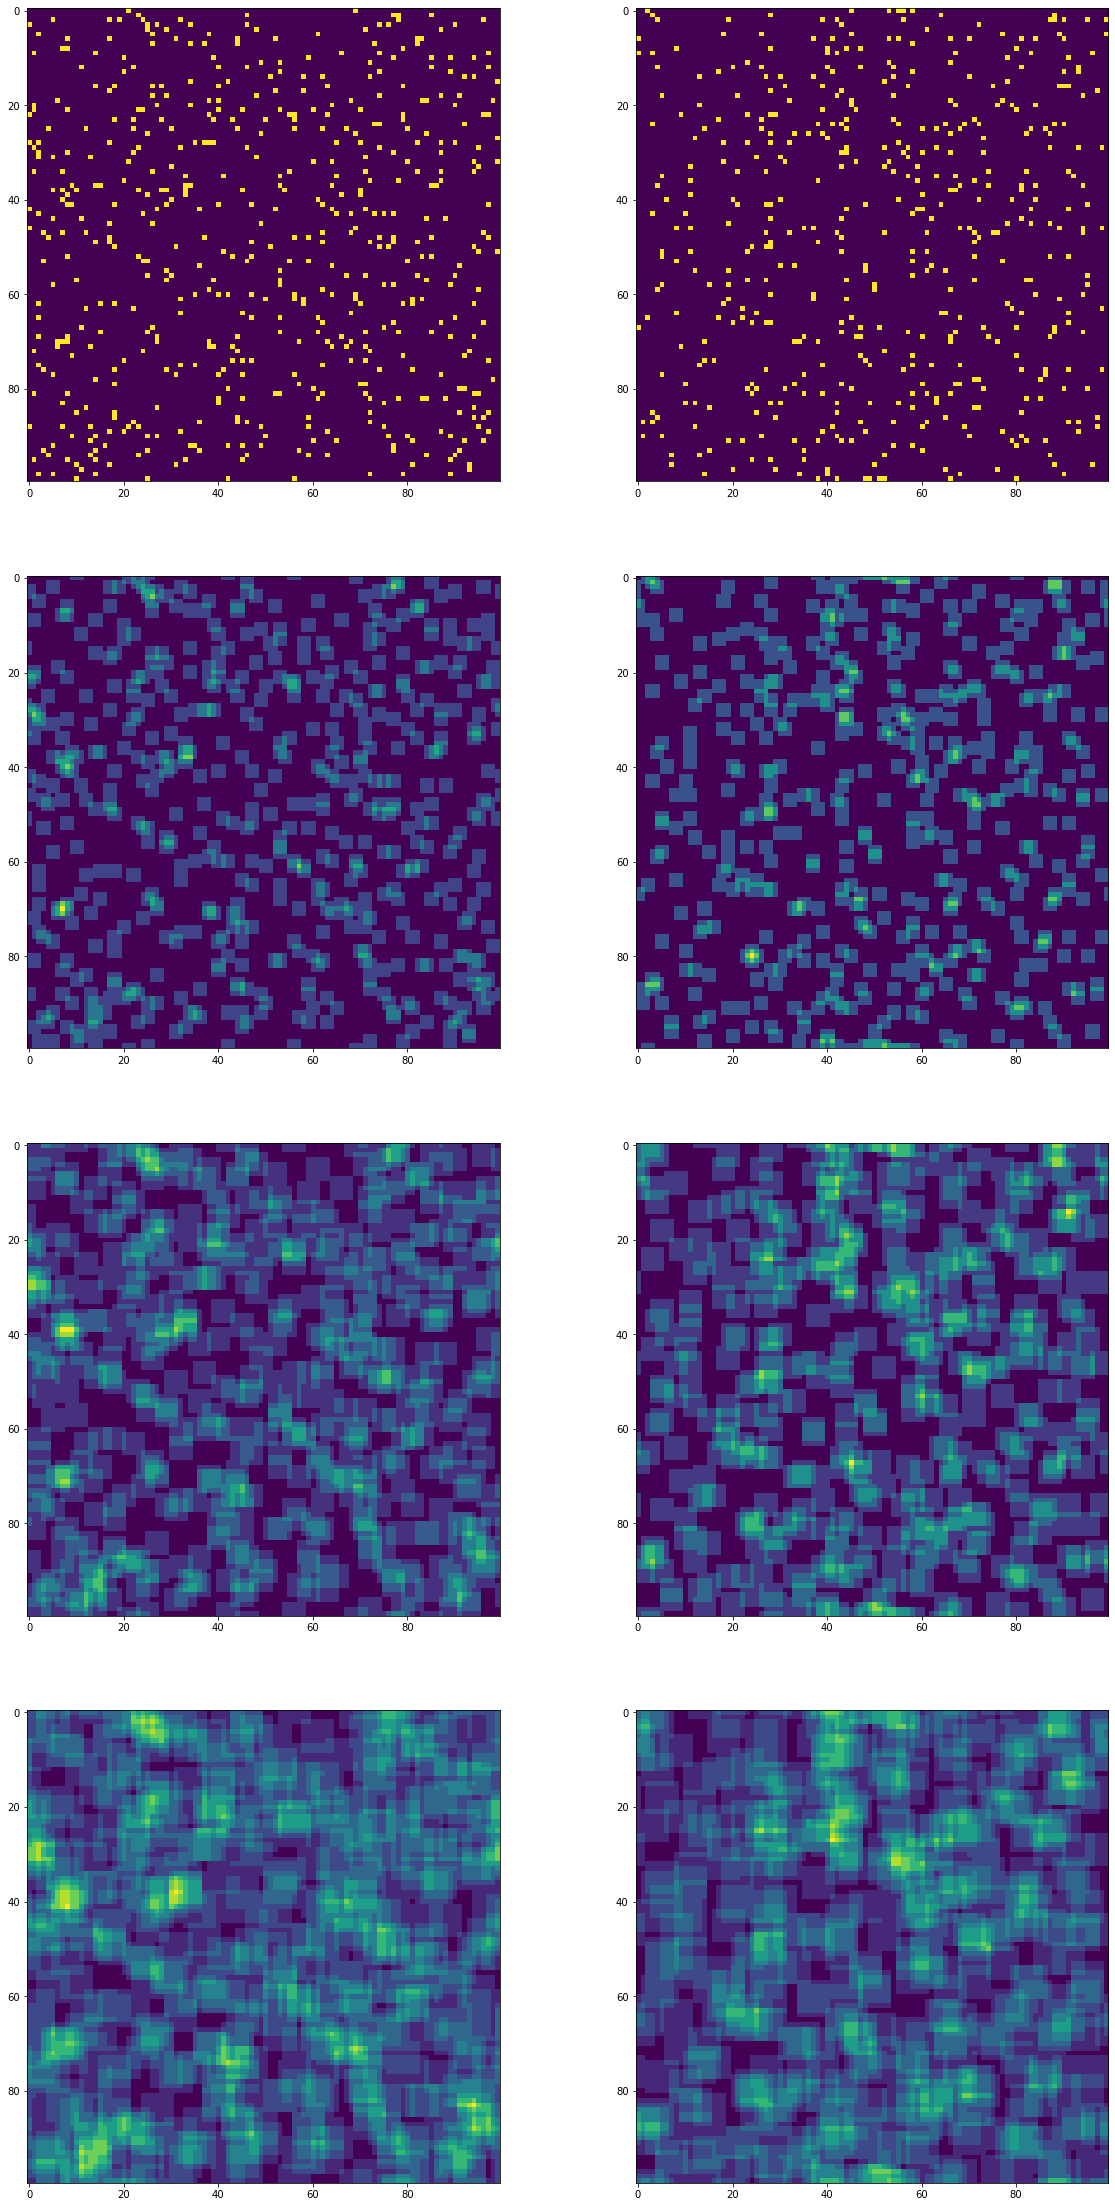

In [56]:
fig, axes = plt.subplots(4, 2)
fig.set_size_inches((10 * 2, 10 * 4))
for i in range(1, 9, 2):
    axes[i // 2, 0].imshow(calc_fractions(a1, i))
    axes[i // 2, 1].imshow(calc_fractions(a2, i))


In [79]:
def calc_fractions(a, n=1):
    f = np.zeros_like(a, dtype=float)
    idx0 = int((n - 1) / 2)
    idx = range(-idx0, idx0+1)
    for i in idx:
        for j in idx:
            f += np.roll(np.roll(a, i, axis=0), j, axis=1)
    return f / n**2
    
def calc_fss(a1, a2, n):
    o = calc_fractions(a1, n)
    m = calc_fractions(a2, n)
    mse_n = 1 / (a1.shape[0] * a1.shape[1]) * ((o - m)**2).sum()
    mse_ref = 1 / (a1.shape[0] * a1.shape[1]) * ((o**2).sum() + (m**2).sum())
    return 1 - mse_n / mse_ref

In [61]:
calc_fss(a1, a2, 5)

0.568206401276709

In [63]:
import scipy.ndimage as ndimage

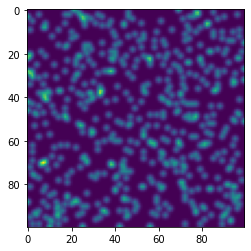

In [74]:
plt.imshow(ndimage.gaussian_filter(a1.astype(float), np.exp(0)))

In [76]:
def calc_gauss(a1, a2, n):
    o = ndimage.gaussian_filter(a1.astype(float), np.exp(n - 2))
    m = ndimage.gaussian_filter(a2.astype(float), np.exp(n - 2))
    mse_n = 1 / (a1.shape[0] * a1.shape[1]) * ((o - m)**2).sum()
    mse_ref = 1 / (a1.shape[0] * a1.shape[1]) * ((o**2).sum() + (m**2).sum())
    return 1 - mse_n / mse_ref

In [80]:
calc_gauss(a1, a2, 1), calc_fss(a1, a2, 1)

(0.048810785027338266, 0.03879728419010675)

In [85]:
l = []
for i in range(1, 13, 2):
    print(i)
    l.append((calc_gauss(a1, a2, i), calc_fss(a1, a2, i)))

l = np.array(l)

1
3
5
7
9
11


In [86]:
l

array([[0.04881079, 0.03879728],
       [0.81444727, 0.31543676],
       [0.98570169, 0.5682064 ],
       [0.99108195, 0.72421289],
       [0.99108195, 0.81259201],
       [0.99108195, 0.86554627]])